In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np

In [2]:
plt.rcdefaults()
fontsize = 14
from matplotlib import font_manager
from matplotlib import rcParams
from matplotlib import rc
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
plt.rcParams['font.serif']=cmfont.get_name()
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "font.size" : fontsize,
          "text.usetex" : False,
          "mathtext.fontset" : "cm",
          "font.family" : "serif",
          "font.serif" : [cmfont.get_name()]}
plt.rcParams['axes.unicode_minus']=False
plt.rcParams.update(params)

<ipython-input-2-3c413fd5304f>:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [3]:
results_free_bmin = pd.read_csv('/scratch/mk7976/fit_results/single_variable/bmin_vary/free_multinest.csv')
results_blip_bmin = pd.read_csv('/scratch/mk7976/fit_results/single_variable/bmin_vary/blip_multinest.csv')
info_bmin = pd.read_csv('/home/mk7976/git/gaiablip/analysis/single_variable/bmin_vary.csv')

In [4]:
results_free_blip = pd.read_csv('/scratch/mk7976/fit_results/single_variable/blip_vary/free_multinest.csv')
results_blip_blip = pd.read_csv('/scratch/mk7976/fit_results/single_variable/blip_vary/blip_multinest.csv')
info_blip = pd.read_csv('/home/mk7976/git/gaiablip/analysis/single_variable/blip_vary.csv')

In [5]:
results_free_mass = pd.read_csv('/scratch/mk7976/fit_results/single_variable/mass_vary/free_multinest.csv')
results_blip_mass = pd.read_csv('/scratch/mk7976/fit_results/single_variable/mass_vary/blip_multinest.csv')
info_mass = pd.read_csv('/home/mk7976/git/gaiablip/analysis/single_variable/mass_vary.csv')

In [6]:
results_free_mass_small = pd.read_csv('/scratch/mk7976/fit_results/single_variable/mass_small_vary/free_multinest.csv')
results_blip_mass_small = pd.read_csv('/scratch/mk7976/fit_results/single_variable/mass_small_vary/blip_multinest.csv')
info_mass_small = pd.read_csv('/home/mk7976/git/gaiablip/analysis/single_variable/mass_small_vary.csv')

In [7]:
mass_full = np.concatenate((info_mass_small['mass'][1:],info_mass['mass'][1:]))[8:]
mass_ts_full = np.concatenate((results_free_mass_small['ts'][1:],results_free_mass['ts'][1:]))[8:]
mass_blip_ts_full = -np.concatenate((results_blip_mass_small['ts'][1:],results_blip_mass['ts'][1:]))[8:]

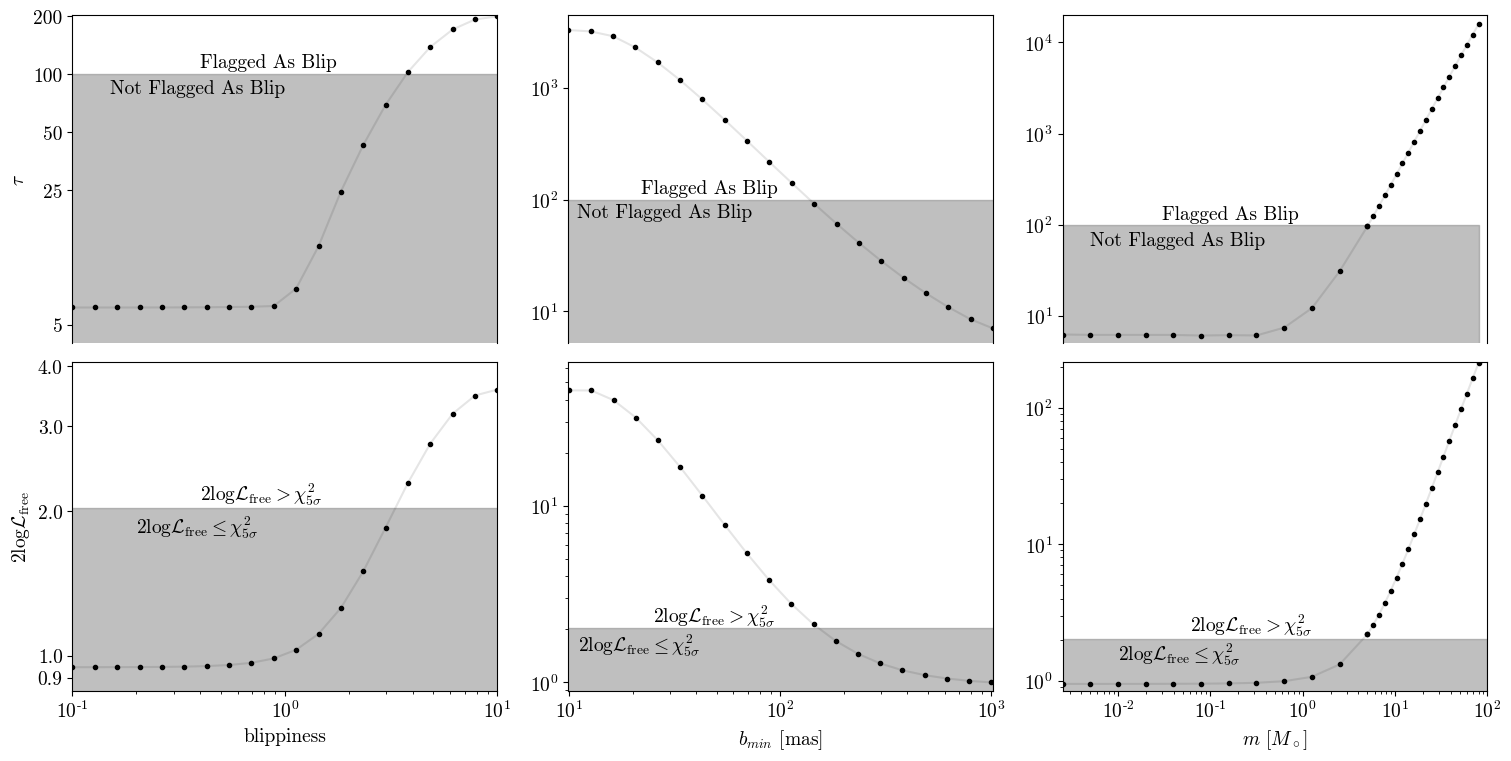

In [8]:
fig, axd = plt.subplot_mosaic([['upper left','upper middle','upper right'],
                              ['lower left','lower middle','lower right']],
                              figsize=(15, 7.5), constrained_layout=True)

axd['upper left'].set_ylabel('$\\tau$')
axd['upper left'].fill_between([info_blip['blip'][0],info_blip['blip'][20]+20],0,100,color='gray',alpha=0.5)
axd['upper left'].set_yscale('log')
axd['upper left'].set_xscale('log')
axd['upper left'].set_xlim(0.1,10,)
axd['upper left'].set_ylim(4.,np.max(-np.array(results_blip_blip['ts'][1:]))+3)
axd['upper left'].spines['bottom'].set_visible(False)
axd['upper left'].xaxis.set_ticks([])
axd['upper left'].minorticks_off()
axd['upper left'].scatter(info_blip['blip'][1:],-np.array(results_blip_blip['ts'][1:]),marker='.',color='black')
axd['upper left'].plot(info_blip['blip'][1:],-np.array(results_blip_blip['ts'][1:]),color='black',alpha=0.1,)
axd['upper left'].set_yticks([5,25,50,100,200])
axd['upper left'].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

axd['upper middle'].set_yscale('log')
axd['upper middle'].set_xscale('log')
axd['upper middle'].fill_between([info_bmin['b_min'][0],info_bmin['b_min'][20]+20],0,100,color='gray',alpha=0.5)
axd['upper middle'].set_xlim(info_bmin['b_min'][1],info_bmin['b_min'][20])
#axd['upper middle'].set_ylim(np.min(-np.array(results_blip_bmin['ts'][1:]))-0.1,np.max(-np.array(results_blip_bmin['ts'][1:]))+3)
axd['upper middle'].spines['bottom'].set_visible(False)
axd['upper middle'].xaxis.set_ticks([])
axd['upper middle'].minorticks_off()
axd['upper middle'].scatter(info_bmin['b_min'][1:],-np.array(results_blip_bmin['ts'][1:]),marker='.',color='black')
axd['upper middle'].plot(info_bmin['b_min'][1:],-np.array(results_blip_bmin['ts'][1:]),color='black',alpha=0.1)

axd['upper right'].set_yscale('log')
axd['upper right'].set_xscale('log')
axd['upper right'].fill_between(mass_full,0,100,color='gray',alpha=0.5)
axd['upper right'].set_xlim(mass_full[0],np.max(mass_full)+20)
axd['upper right'].set_ylim(5,20000)
axd['upper right'].spines['bottom'].set_visible(False)
axd['upper right'].xaxis.set_ticks([])
axd['upper right'].minorticks_off()
axd['upper right'].scatter(mass_full,mass_blip_ts_full,marker='.',color='black')
axd['upper right'].plot(mass_full,mass_blip_ts_full,color='black',alpha=0.1)


axd['lower left'].set_xlabel('blippiness')
axd['lower left'].set_ylabel(r'$2\log\mathcal{L}_{\rm free}$')
axd['lower left'].set_yscale('log')
axd['lower left'].set_xscale('log')
#axd['lower left'].fill_between([info_blip['blip'][0],info_blip['blip'][20]+20],152/75,200,color='orange',alpha=0.5)
axd['lower left'].fill_between([info_blip['blip'][0],info_blip['blip'][20]+20],0,152/75,color='gray',alpha=0.5)
axd['lower left'].set_xlim(0.1,10,)
axd['lower left'].set_ylim(np.min(results_free_blip['ts'][1:]/75)-0.1,np.max(results_free_blip['ts'][1:]/75)+0.5)
axd['lower left'].scatter(info_blip['blip'][1:],results_free_blip['ts'][1:]/75,marker='.',color='black')
axd['lower left'].plot(info_blip['blip'][1:],results_free_blip['ts'][1:]/75,color='black',alpha=0.1)
axd['lower left'].set_yticks([0.9,1,2,3,4])
axd['lower left'].get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

axd['lower middle'].set_xlabel('$b_{min}$ [mas]')
axd['lower middle'].set_yscale('log')
axd['lower middle'].set_xscale('log')
#axd['lower middle'].fill_between([info_bmin['b_min'][0],info_bmin['b_min'][20]+20],152/75,500,color='orange',alpha=0.5)
axd['lower middle'].fill_between([info_bmin['b_min'][0],info_bmin['b_min'][20]+20],0,152/75,color='gray',alpha=0.5)
axd['lower middle'].set_xlim(np.min(info_bmin['b_min'][1:]-0.1),np.max(info_bmin['b_min'][1:])+20)
axd['lower middle'].set_ylim(np.min(np.array(results_free_bmin['ts'][1:])/75.)-0.1,np.max(np.array(results_free_bmin['ts'][1:])/75.)+20)
axd['lower middle'].scatter(info_bmin['b_min'][1:],results_free_bmin['ts'][1:]/75.,marker='.',color='black')
axd['lower middle'].plot(info_bmin['b_min'][1:],results_free_bmin['ts'][1:]/75.,color='black',alpha=0.1)

axd['lower right'].set_xlabel('$m$ [$M_\circ$]')
axd['lower right'].set_yscale('log')
axd['lower right'].set_xscale('log')
#axd['lower right'].fill_between([info_mass['mass'][0],info_mass['mass'][20]+20],152/75,500,color='orange',alpha=0.5)
axd['lower right'].fill_between([info_mass['mass'][0],info_mass['mass'][20]+20],0,152/75,color='gray',alpha=0.5)
axd['lower right'].set_xlim(mass_full[0],np.max(mass_full)+20)
axd['lower right'].set_ylim(np.min(mass_ts_full/75)-0.1,np.max(mass_ts_full/75)+3)
axd['lower right'].scatter(mass_full,mass_ts_full/75.,marker='.',color='black')
axd['lower right'].plot(mass_full,mass_ts_full/75,color='black',alpha=0.1)

axd['upper left'].text(0.4, 108, r'Flagged As Blip',rotation=0,color='black',fontweight='bold')
axd['upper left'].text(0.15, 80, r'Not Flagged As Blip',rotation=0,color='black',fontweight='bold')

axd['upper middle'].text(22, 115, r'Flagged As Blip',rotation=0,color='black',fontweight='bold')
axd['upper middle'].text(11, 70, r'Not Flagged As Blip',rotation=0,color='black',fontweight='bold')

axd['upper right'].text(3e-2, 115, r'Flagged As Blip',rotation=0,color='black',fontweight='bold')
axd['upper right'].text(0.5e-2, 60, r'Not Flagged As Blip',rotation=0,color='black',fontweight='bold')

axd['lower left'].text(0.20, 1.8, r'$2\log\mathcal{L}_{\rm free}\leq\chi^2_{5\sigma}$',rotation=0,color='black',fontweight='bold')
axd['lower left'].text(0.40, 2.1, r'$2\log\mathcal{L}_{\rm free}>\chi^2_{5\sigma}$',rotation=0,color='black',fontweight='bold')

axd['lower middle'].text(11, 1.5, r'$2\log\mathcal{L}_{\rm free}\leq\chi^2_{5\sigma}$',rotation=0,color='black',fontweight='bold')
axd['lower middle'].text(25, 2.2, r'$2\log\mathcal{L}_{\rm free}>\chi^2_{5\sigma}$',rotation=0,color='black',fontweight='bold')

axd['lower right'].text(1e-2, 1.4, r'$2\log\mathcal{L}_{\rm free}\leq\chi^2_{5\sigma}$',rotation=0,color='black',fontweight='bold')
axd['lower right'].text(6e-2, 2.3, r'$2\log\mathcal{L}_{\rm free}>\chi^2_{5\sigma}$',rotation=0,color='black',fontweight='bold')

plt.show()